# Проект по теме "advenced SQL"

Необходимые данные находятся в таблицах схемы `stackoverflow`. 

Некоторые задания включают дополнительные вопросы — не пропустите их. На часть вопросов можно ответить текстом, а для некоторых понадобится визуализация. Помните, что результат запроса можно выгрузить в датафрейм. 

Чтобы ожидаемый результат было легче представить, мы добавили к каждому заданию небольшой фрагмент итоговой таблицы. В запросах вы можете использовать любые подходящие названия полей.

In [1]:
#импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine 

### Конфигурация для подключения к базе данных `data-analyst-advanced-sql`
Эта база данных содержит схему `stackoverflow`, с которой вы будете работать в проекте

In [2]:
#словарь настроек подключения к базе данных
db_config = {
    'user': 'praktikum_student', # имя пользователя
    'pwd': 'Sdf4$2;d-d30pp@', # пароль
    'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
    'port': 6432, # порт подключения
    'db': 'data-analyst-advanced-sql' # название базы данных
}  

#сторока подключения к базе данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

Создание подключения

In [3]:
engine = create_engine(connection_string) 

Пример запроса к базе данных

`sample_df` является pandas-датафреймом.

In [4]:
query = '''
SELECT *
FROM stackoverflow.users
LIMIT 10;
'''

sample_df = pd.read_sql_query(query, con=engine) 

In [5]:
sample_df

,id,creation_date,display_name,last_access_date,location,reputation,views
0,1,2008-07-31 14:22:31,Jeff Atwood,2018-08-29 02:34:23,"El Cerrito, CA",44300,408587
1,2,2008-07-31 14:22:31,Geoff Dalgas,2018-08-23 17:31:56,"Corvallis, OR",3491,23966
2,3,2008-07-31 14:22:31,Jarrod Dixon,2018-08-30 20:56:24,"Raleigh, NC, United States",13418,24396
3,4,2008-07-31 14:22:31,Joel Spolsky,2018-08-14 22:18:15,"New York, NY",28768,73755
4,5,2008-07-31 14:22:31,Jon Galloway,2018-08-29 16:48:36,"San Diego, CA",39172,11700
5,8,2008-07-31 21:33:24,Eggs McLaren,2018-04-09 02:04:56,None,942,6372
6,9,2008-07-31 21:35:27,Kevin Dente,2018-08-30 18:18:03,"Oakland, CA",14337,4949
7,11,2008-08-01 00:59:11,Anonymous User,2008-08-01 00:59:11,None,1890,2123
8,13,2008-08-01 04:18:05,Chris Jester-Young,2018-08-30 02:47:23,"Raleigh, NC, United States",177138,35414
9,17,2008-08-01 12:02:22,Nick Berardi,2018-01-22 01:35:38,"Issaquah, WA",44443,4786


# Задание 1

Выведите общую сумму просмотров постов за каждый месяц 2008 года. Если данных за какой-либо месяц в базе нет, такой месяц можно пропустить. Результат отсортируйте по убыванию общего количества просмотров.

| month_date  | total_views |
| ------------- | ------------- |
| 2008-09-01  | 452928568  |
| 2008-10-01  | 365400138  |
| ...         | ... |

In [6]:
# напишите запрос
query = '''
select DATE_TRUNC('month', creation_date)::date as month_date, SUM(views_count) as total_views
from stackoverflow.posts p
where DATE_TRUNC('year', creation_date) = '2008-01-01'
group by month_date
'''
# выполните запрос
first_task = pd.read_sql_query(query, con=engine) 

Проанализируйте итоговую таблицу. Отличаются ли данные за разные месяцы? С чем могут быть связаны отличия?

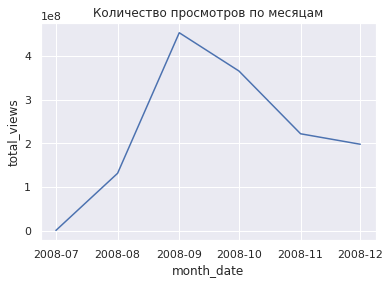

In [7]:
# напишите ваш ответ здесь
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(x="month_date", y="total_views",
             data=first_task)
plt.title('Количество просмотров по месяцам')
plt.show()

Анализируя график можно заметить, что в  июле у нас аномально малое количество просмотров. Наиболее вероятно, что у нас прочто не все данные за месяц.

Август как последний летний месяц - период отпусков и отдыха, поэтому люди еще не актывны.

Далее идет скачек, когда все что отложили летом пришло время сделать, к тому же началась общая активность, поэтому мы получем пик. Этот пик немного захватывает и октябрь. Ноябрь у нас постепенное снижение просмотров, поскольку все что отложили летом уже просмотрели и уточнили и остались в основном только текущие проблемы. 

Ну а декабрь во всех англоговорящих странах является несколько более коротким месяцем - 25 декабря - рождество + новый год, хотя новый год так усиленно как России они не празднуют. 

In [8]:
del first_task

# Задание 2

Выведите имена самых активных пользователей, которые в первый месяц после регистрации (включая день регистрации) дали больше 100 ответов. Вопросы, которые задавали пользователи, не учитывайте. Для каждого имени пользователя выведите количество уникальных значений `user_id`. Отсортируйте результат по полю с именами в лексикографическом порядке.

| display_name | count |
| ------------ | ----- |
| 1800 INFORMATION | 1 |
| Adam Bellaire | 1 |
| Adam Davis | 1 |
| ... | ... |

In [32]:
# напишите запрос
query = '''
select count(distinct id) as uniq_users, display_name
from (
(select id, display_name, creation_date::date as user_creation
from stackoverflow.users) u
inner join
(select user_id, id as post_id, creation_date::date as post_creation
from stackoverflow.posts
where post_type_id = 2) p on p.user_id = u.id 
)
where user_creation  + INTERVAL'1 month' > post_creation
group by display_name having count(post_id)> 100
order by display_name
'''

# выполните запрос
second_task = pd.read_sql_query(query, con=engine) 

In [33]:
second_task

,uniq_users,display_name
0,1,1800 INFORMATION
1,1,Adam Bellaire
2,1,Adam Davis
3,1,Adam Liss
4,8,Alan
...,...,...
71,1,leppie
72,1,lomaxx
73,1,mattlant
74,1,paxdiablo


Какие аномалии наблюдаются в данных? О чём они говорят?

Постоим гистограммы

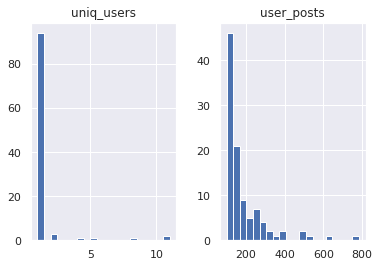

In [11]:
second_task.hist(bins = 20)
plt.show()

У нас есть пользователи с дублирующимися именами, у нас есть пользователи написавшие действительно много ответов. Посмотрим эти 2 выборки повнимательнее.

Начнем с именами пользователей, которым соответствуют несколько идентификаторов.

In [12]:
# напишите ваш ответ здесь
second_task[second_task['uniq_users'] > 1]

,uniq_users,display_name,user_posts
8,11,Brian,226
25,8,Greg,178
41,2,Kev,156
62,5,Owen,166
66,11,Rob,108
74,4,Tim,129
83,2,Will,267
92,2,jfs,145


Таких имен всего 8. Причем есть самые "популярные" - Brain и Robю Каких то других аномалий нет.

Что бы отсечь выбросы в 'user_posts' построим "ящик с учасами".

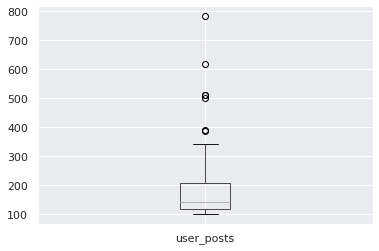

In [13]:
second_task[['user_posts']].boxplot()
plt.show()

Пользователи с аномально большим количеством ответов - это пользователи у которых больше чем 350 ответов. Россмотрим их внимательнее.

In [14]:
# напишите ваш ответ здесь
display(second_task[second_task['user_posts'] > 350])

,uniq_users,display_name,user_posts
26,1,Greg Hewgill,500
31,1,Joel Coehoorn,510
35,1,Jon Skeet,783
46,1,Marc Gravell,513
69,1,S.Lott,392
82,1,VonC,386
100,1,tvanfosson,620


Таких пользователей всего 7. Посмотрим какой процент ответов от общего числа ответов написан этими пользователями 

In [15]:
print(round(sum(second_task[second_task['user_posts'] > 350]['user_posts'])/sum(second_task['user_posts'])*100, 2), 'процентов всех ответов написано всего 7-ю пользователями')

19.56 процентов всех ответов написано всего 7-ю пользователями


Всего 7 пользователей делают примерно 20 процентов всех ответов. Это невероятно.

In [16]:
del second_task

# Задание 3

Выведите количество постов за 2008 год по месяцам. Отберите посты от пользователей, которые зарегистрировались в сентябре 2008 года и сделали хотя бы один пост в декабре того же года. Отсортируйте таблицу по значению месяца по убыванию.

| month | count |
| ------|------ |
| 2008-12-01 | 17641 |
| 2008-11-01 | 18294 |
| ... | ... |

In [17]:
# напишите запрос
query = '''
select DATE_TRUNC('month', creation_date)::date as month,
COUNT(id)
from stackoverflow.posts p1
where user_id in (select distinct user_id
				from stackoverflow.posts p 
				where user_id in (select id
					from stackoverflow.users u 
					where DATE_TRUNC('day', creation_date)::date between '2008-09-01' and '2008-09-30'
					) and date_trunc('day', creation_date)::date between '2008-12-01' and '2008-12-31'
				)
group by DATE_TRUNC('month', creation_date)::date
order by DATE_TRUNC('month', creation_date)::date DESC

'''

# выполните запрос
third_task = pd.read_sql_query(query, con=engine) 

In [18]:
third_task.head()

,month,count
0,2008-12-01,17641
1,2008-11-01,18294
2,2008-10-01,27171
3,2008-09-01,24870
4,2008-08-01,32


Изучите данные: есть ли в них аномалии? Предположите, почему могли появиться аномальные значения.

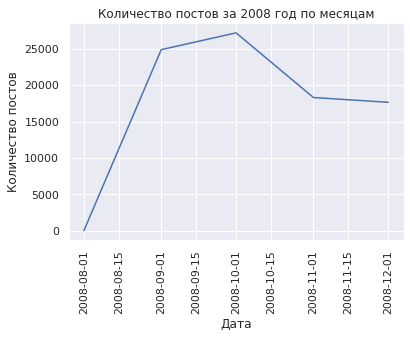

In [19]:
plt.plot('month', 'count', data = third_task)
plt.xticks(rotation=90)
plt.ylabel('Количество постов')
plt.xlabel('Дата')
plt.title('Количество постов за 2008 год по месяцам')
plt.show()

Судя по графику мользователи особенно активны первый месяц после регистрации, затем интерес начинает падать и колличество постов сокращается.

In [20]:
del third_task

# Задание 4

Используя данные о постах, выведите несколько полей:

- идентификатор пользователя, который написал пост;
- дата создания поста;
- количество просмотров у текущего поста;
- сумму просмотров постов автора с накоплением.

Данные в таблице должны быть отсортированы по возрастанию идентификаторов пользователей, а данные об одном и том же пользователе — по возрастанию даты создания поста.

| user_id | creation_date | views_count | cumulative_count |
| ------ | -------------- | ----------- | ---------------- |
| 1 | 2008-07-31 23:41:00  | 480476   | 480476  |
| 1 | 2008-07-31 23:55:38  | 136033 | 616509  | 
| 1 | 2008-07-31 23:56:41  | 0 |  616509  |
| ... | ... | ... | ... |
| 2 | 2008-07-31 23:56:41 | 79087  | 79087 |
| 2 | 2008-08-01 05:09:56 | 65443 | 144530 |
| ... | ...  | ...  | ...  |

In [21]:
# напишите запрос
query = '''
select user_id, creation_date::date, views_count,
SUM(views_count) over (partition by user_id order by user_id,  creation_date) as cumulative_count 
from stackoverflow.posts p
'''

# выполните запрос
fourth_task = pd.read_sql_query(query, con=engine) 

<details>

<summary>Подсказка</summary>
Для подсчёта суммы с накоплением используйте оконную функцию.
</details>

In [22]:
fourth_task.head()

,user_id,creation_date,views_count,cumulative_count
0,1,2008-07-31,480476,480476
1,1,2008-07-31,136033,616509
2,1,2008-07-31,0,616509
3,1,2008-08-04,0,616509
4,1,2008-08-04,0,616509


In [23]:
del fourth_task

# Задание 5

Найдите среднее количество постов пользователей в день за август 2008 года. Отберите данные о пользователях, которые опубликовали больше 120 постов за август. Дни без публикаций не учитывайте. 

Отсортируйте результат по возрастанию среднего количества постов. Значения можно не округлять.

| user_id | avg_daily |
| ------- | --------- |
| 116     | 4.777778  |
| 234     | 5.208333  |
| ...     | ... |

In [24]:
# напишите запрос
query = '''
select user_id, AVG(post_count) as avg_daily
from (
	select user_id, date_trunc('day', creation_date)::date as date, COUNT(id) as post_count
	from stackoverflow.posts p
	where date_trunc('day', creation_date)::date between '2008-08-01' and '2008-08-31' 
	group by user_id, date_trunc('day', creation_date)::date having COUNT(id)>0) as t
group by user_id having sum(post_count)>120
order by AVG(post_count)
'''

# выполните запрос
fifth_task = pd.read_sql_query(query, con=engine) 

<details>

<summary>Подсказка</summary>
Сначала найдите идентификаторы пользователей, которые написали более 120 постов за август. Используя этот запрос в качестве подзапроса для среза, найдите и сохраните во временную таблицу идентификаторы нужных пользователей, дни августа и количество постов в день. В основном запросе сгруппируйте данные по пользователям и найдите для каждого из них среднее количество постов.
</details>

In [25]:
fifth_task.head()

,user_id,avg_daily
0,116,4.777778
1,234,5.208333
2,91,5.681818
3,905,7.000000
4,383,7.277778


In [26]:
del fifth_task

# Задание 6

Сколько в среднем дней в период с 1 по 7 декабря 2008 года пользователи взаимодействовали с платформой? Для каждого пользователя отберите дни, в которые он или она опубликовали хотя бы один пост. Нужно получить одно целое число — не забудьте округлить результат. 

| result |
| -----  |
| <целое число> |

In [27]:
# напишите запрос
query = '''
select ROUND(AVG(counter),0)::integer as result
from (select user_id, date_trunc('day', creation_date)::date, count(id) as counter
	from stackoverflow.posts p
	where date_trunc('day', creation_date)::date between '2008-12-01' and '2008-12-07'
	group by user_id, date_trunc('day', creation_date)::date
	having count(id) > 0) as t
'''

# выполните запрос
sixth_task = pd.read_sql_query(query, con=engine) 

<details>

<summary>Подсказка</summary>
Посчитайте, сколько активных дней было у каждого пользователя. Добавьте данные во временную таблицу и используйте в основном запросе.
</details>

In [28]:
sixth_task.head()

,result
0,2


Проанализируйте итоговую таблицу — какие выводы можно сделать?

В среднем на пользователя приходится 2 поста. Вероятно есть много пользователей с одним постом и не очень большое колиичество пользователей большим количеством постов. А в среднем выходит 2

In [29]:
del sixth_task

# Задание 7

Выведите историю активности каждого пользователя в таком виде: идентификатор пользователя, дата публикации поста. Отсортируйте вывод по возрастанию идентификаторов пользователей, а для каждого пользователя — по возрастанию даты публикации.

Добавьте в таблицу новое поле: для каждого поста в нём будет указано название месяца предпоследней публикации пользователя относительно текущей. Если такой публикации нет, укажите `NULL`.  Python автоматически поменяет `NULL` на `None`, но дополнительно преобразовывать значения `None` вам не нужно.

Посмотрите внимательно на образец таблицы: для первых двух постов предпоследней публикации нет, но, начиная с третьего поста, в новое поле входит нужный месяц. Для следующего пользователя в первые две записи поля `second_last_month` тоже войдёт `NULL`.

| user_id | creation_date | second_last_month |
| ------- | ------------- | ----------------- |
| 1       | 2008-07-31 23:41:00 | None |
| 1       | 2008-07-31 23:55:38 | None |
| 1       | 2008-07-31 23:56:41 | July |
| 1       | 2008-08-04 02:45:08 | July |
| 1       | 2008-08-04 04:31:03 | July |
| 1       | 2008-08-04 08:04:42 | August |
| ... | ... | ... |

In [30]:
# напишите запрос
query = '''
select id, user_id, creation_date, 
TO_CHAR(lag(creation_date, 2, NULL) over (partition by user_id order by id),'month') as second_last_month
from stackoverflow.posts p
order by user_id, creation_date
'''

# выполните запрос
seventh_task = pd.read_sql_query(query, con=engine) 

<details>

<summary>Подсказка</summary>
Преобразовать результат оконной функции в нужное значение вам поможет аналог условного оператора в SQL: CASE <поле> WHEN <старое значение> THEN <новое значение> END.
</details>

In [31]:
seventh_task.head()

,id,user_id,creation_date,second_last_month
0,9,1,2008-07-31 23:41:00,None
1,11,1,2008-07-31 23:55:38,None
2,12,1,2008-07-31 23:56:41,july
3,986,1,2008-08-04 02:45:08,july
4,1016,1,2008-08-04 04:31:03,july


In [32]:
del seventh_task

# Задание 8

Рассчитайте аналог Retention Rate по месяцам для пользователей StackOverflow. Объедините пользователей в когорты по месяцу их первого поста. Возвращение определяйте по наличию поста в текущем месяце. 

| cohort_dt | session_date | users_cnt | cohort_users_cnt | retention_rate |
| --- | --- | --- | --- | --- |
| 2008-07-01 00:00:00 | 2008-07-01 00:00:00 | 3 | 3 | 100 |
| 2008-07-01 00:00:00 | 2008-08-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-09-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-10-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-07-01 00:00:00 | 2008-11-01 00:00:00 | 1 | 3 | 33,33 |
| 2008-07-01 00:00:00 | 2008-12-01 00:00:00 | 2 | 3 | 66,67 |
| 2008-08-01 00:00:00 | 2008-08-01 00:00:00 | 2151 | 2151 | 100 |
| ... | ... | ... | ... | ... |

In [33]:
# напишите запрос
query = '''
with session_t as (
 			select user_id, date_trunc('month', creation_date) as session_date
 			from stackoverflow.posts
 			group by user_id, date_trunc('month', creation_date)),
 	 profile as (
 	 select *,
 	 COUNT(user_id) over (partition by cohort_dt) as cohort_users_cnt
 	 from (
 	 		select distinct user_id, 
 	 		first_value(date_trunc('month', creation_date)) over (partition by user_id order by creation_date) as cohort_dt
 	 		from stackoverflow.posts) as t
 	 )
select cohort_dt, session_date, COUNT(p.user_id) as users_cnt, cohort_users_cnt,
ROUND(COUNT(p.user_id) * 100.0 / cohort_users_cnt, 2) AS retention_rate
from profile p
join session_t s on s.user_id =p.user_id
group by cohort_dt, session_date, cohort_users_cnt
order by cohort_dt, session_date
'''

# выполните запрос
eighth_task = pd.read_sql_query(query, con=engine) 

<details>

<summary>Подсказка</summary>
Вспомните, как выглядел запрос для расчёта Retention Rate в теории. Создайте две временные таблицы: `profile` и `sessions` (в ней будет информация о публикациях), а затем используйте их в основном запросе.

Во временной таблице `profile` вам понадобятся три поля:

- идентификатор пользователя;
- дата первого поста пользователя, усечённая до месяца (признак начала когорты);
- количество пользователей этой когорты.
</details>

In [34]:
eighth_task.head()

,cohort_dt,session_date,users_cnt,cohort_users_cnt,retention_rate
0,2008-07-01,2008-07-01,3,3,100.00
1,2008-07-01,2008-08-01,2,3,66.67
2,2008-07-01,2008-09-01,1,3,33.33
3,2008-07-01,2008-10-01,2,3,66.67
4,2008-07-01,2008-11-01,1,3,33.33


Постройте тепловую карту Retention Rate. Какие аномалии или другие необычные явления удалось выявить? Сформулируйте гипотезы о возможных причинах.

In [35]:
# постройте тепловую карту Retention Rate
retention = eighth_task.pivot('cohort_dt', 'session_date', 'retention_rate')
retention.head()

session_date,2008-07-01,2008-08-01,2008-09-01,2008-10-01,2008-11-01,2008-12-01
cohort_dt,,,,,,
2008-07-01,100.0,66.67,33.33,66.67,33.33,66.67
2008-08-01,NaN,100.00,73.04,59.27,48.81,41.56
2008-09-01,NaN,NaN,100.00,53.82,38.63,32.56
2008-10-01,NaN,NaN,NaN,100.00,45.19,33.65
2008-11-01,NaN,NaN,NaN,NaN,100.00,40.36


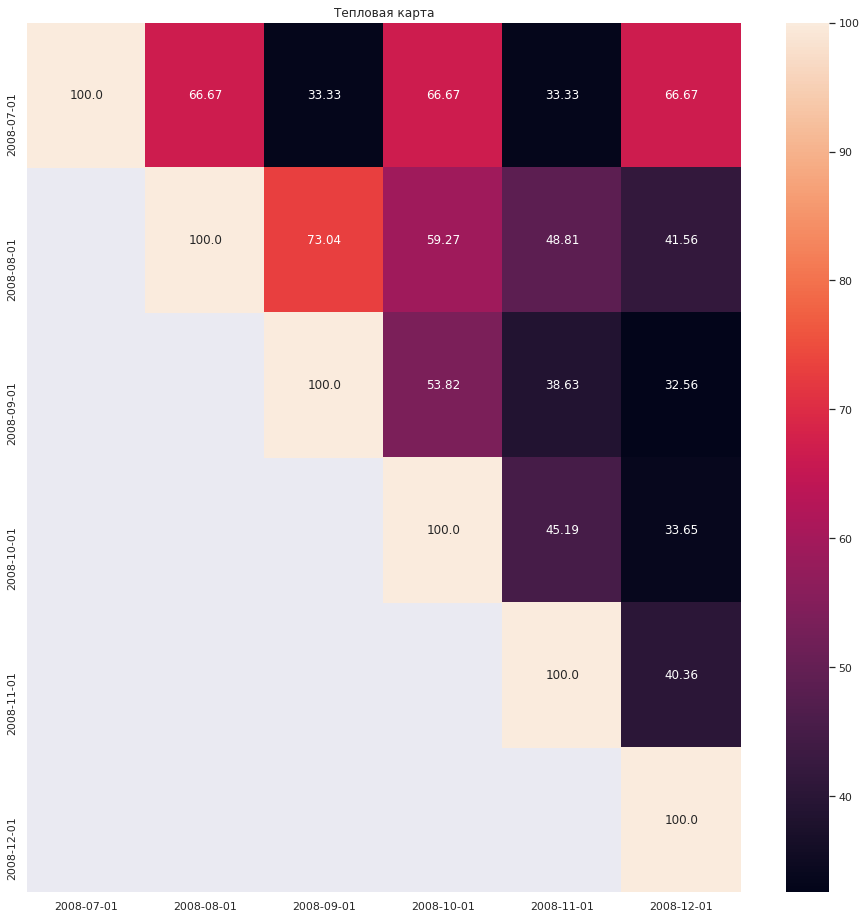

In [36]:
# создаём сводную таблицу с результатами
retention.index = [str(x)[0:10] for x in retention.index]
retention.columns = [str(x)[0:10] for x in retention.columns]

# строим хитмэп
plt.figure(figsize=(16, 16)) # задаём размер графика
sns.heatmap(retention, # датафрейм с данными
            annot=True, # добавляем подписи
            fmt='') # задаём исходный формат
plt.title('Тепловая карта') # название графика
plt.show()

Июль совсем не показательный, это месяц когда пользователей было совсем мало. А вот по августу уже можно смотреть. Сентябрь - месяц начала работы после летних отпусков. Поэтому у пользователей зарегистрированных в августе интерес в сентябре сохраняется дотстаточно высокий. Фактически люди решают все отложенные летом вопросы. В остальных месяцах интерес падает быстрее, что на мой взгляд гараздно более похоже на правильный результат, к которому не примешаны отложенные вопросы.

In [37]:
del eighth_task

# Задание 9


На сколько процентов менялось количество постов ежемесячно с 1 сентября по 31 декабря 2008 года? Отобразите таблицу со следующими полями:

- номер месяца;
- количество постов за месяц;
- процент, который показывает, насколько изменилось количество постов в текущем месяце по сравнению с предыдущим.

Если постов стало меньше, значение процента должно быть отрицательным, если больше — положительным. Округлите значение процента до двух знаков после запятой.

Напомним, что при делении одного целого числа на другое в PostgreSQL в результате получится целое число, округлённое до ближайшего целого вниз. Чтобы этого избежать, переведите делимое в тип `numeric`.

| creation_month | posts_count | percentage |
| -------------- | ----------- | ---------- |
| 9 | 70731 | Nan |
| 10 | 63102 | -10.33 |
| ... | ... | ... |

In [38]:
# напишите запрос
query = '''
select creation_month::integer, posts_count::integer, 
(posts_count - LAG(posts_count) over (order by creation_month::integer))/LAG(posts_count) over (order by creation_month::integer) as percentage
from (select distinct date_part('month', creation_date) as creation_month, 
		(COUNT(id) over (partition by date_part('month', creation_date)))::numeric as posts_count
		from stackoverflow.posts p
		where date_trunc('day', creation_date)::date between '2008-09-01' and '2008-12-31' ) as t
'''

# выполните запрос
ninth_task = pd.read_sql_query(query, con=engine) 

<details>

<summary>Подсказка</summary>
Эту задачу стоит декомпозировать. Сформируйте запрос, который отобразит номер месяца и количество постов. Затем можно использовать оконную функцию, которая вернёт значение за предыдущий месяц, и посчитать процент.
</details>

In [39]:
ninth_task.head()

,creation_month,posts_count,percentage
0,9,70371,NaN
1,10,63102,-0.103295
2,11,46975,-0.255570
3,12,44592,-0.050729


Постройте круговую диаграмму с количеством постов по месяцам.

In [40]:
# постройте круговую диаграмму с количеством постов по месяцам

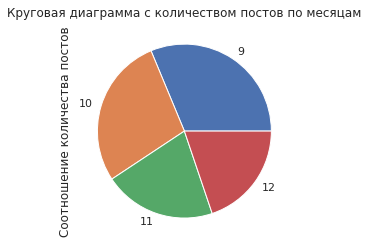

In [41]:
ninth_task['posts_count'].plot(kind='pie', labels = list(ninth_task['creation_month']), label = 'Соотношение количества постов')
plt.title('Круговая диаграмма с количеством постов по месяцам')
plt.show()

In [42]:
del ninth_task

# Задание 10

Выгрузите данные активности пользователя, который опубликовал больше всего постов за всё время. Выведите данные за октябрь 2008 года в таком виде:

- номер недели;
- дата и время последнего поста, опубликованного на этой неделе.

| week_creation | creation_date |
| ------------- | ------------- |
| 40 | 2008-10-05 09:00:58 |
| 41 | 2008-10-12 21:22:23 |
| ... | ... |

In [43]:
# напишите запрос
query = '''
select distinct DATE_PART('week', creation_date::date)::integer as week_creation,
MAX(creation_date) over (partition by DATE_PART('week', creation_date::date))
from stackoverflow.posts p1
where user_id in (
			select distinct first_value(user_id) OVER()	
			from(select user_id, COUNT(id) as cntr
					from stackoverflow.posts p
					group by user_id
					order by cntr desc) as t
					)
and date_trunc('day', creation_date)::date between '2008-10-01' and '2008-10-31'
'''

# выполните запрос
tenth_task = pd.read_sql_query(query, con=engine) 

In [44]:
tenth_task.head()

,week_creation,max
0,40,2008-10-05 09:00:58
1,41,2008-10-12 21:22:23
2,42,2008-10-19 06:49:30
3,43,2008-10-26 21:44:36
4,44,2008-10-31 22:16:01


<details>

<summary>Подсказка</summary>
Декомпозируйте задачу:
1) Найдите пользователя, который опубликовал больше всего постов. 2) Найдите дату и время создания каждого поста этого пользователя и номер недели. 
3) Отобразите данные только о последних постах пользователя. Для этого можно использовать оконную функцию.
</details>

In [45]:
del tenth_task

# Вывод

Выполнено 10 заданий. Постоено 6 графиков. Отработаны на практике оконные функции и сложные запросы.